# Import Libray

In [1]:
import tensorflow as tf
keras = tf.keras

import matplotlib.pyplot as plt
import numpy as np

# Persiapan Data

In [2]:
# Data sebesar 11MB akan didownload secara otomatis jika belum pernah sebelumnya
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [3]:
# Mendapatkan unique data
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

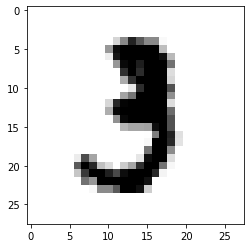

In [5]:
# Menampilkan salah satu data dengan matplotlib
plt.imshow(x_train[10],cmap='binary');

# Pengolahan Data

In [6]:
# Convert gambar menjadi tensor object
x_train = tf.constant(x_train)
x_test = tf.constant(x_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

# Membangun Neural Network

In [7]:
model = keras.Sequential([
    # Input Layers
    tf.keras.layers.Flatten(input_shape=(28,28,)),
    
    # Hidden Layers
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    
    # Output Layers
    keras.layers.Dense(10,activation='softmax')
])

# Input shape merupakan ukuran gambar yaitu 28x28
# Untuk output layer 10 unit merupakan jumlah dari unique data

In [8]:
# Compile model
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [9]:
# Menampilkan informasi model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

# Membuat Callback & Earlystopping Function

In [10]:
import os
import datetime

In [11]:
# Menggunakan tensorboard untuk monitor perkembangan model dalam latihan
%load_ext tensorboard
def createCallback():
    os.makedirs('logs',exist_ok=True)
    logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

In [12]:
callback = createCallback()
earlystopping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

# Melatih Neural Network

In [13]:
# Masukan hasil latihan ke dalam variabel history agar dapat dilihat progressnya setelah selesai
# Alternatif untuk penggunaan tensorboard
history = model.fit(x_train,y_train,verbose=1,epochs=50,batch_size=32,callbacks=[callback,earlystopping])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 179us/sample - loss: 0.5038 - accuracy: 0.8840
Epoch 2/50
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1858 - accuracy: 0.9460
Epoch 3/50
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1436 - accuracy: 0.9590
Epoch 4/50
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1238 - accuracy: 0.9644
Epoch 5/50
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1061 - accuracy: 0.9706
Epoch 6/50
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0923 - accuracy: 0.9757
Epoch 7/50
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0835 - accuracy: 0.9769
Epoch 8/50
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0773 - accuracy: 0.9790
Epoch 9/50
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0693 - accuracy: 0.9809
Epoc

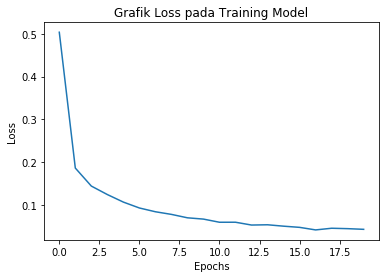

In [16]:
# Menampilkan grafik loss per epochs pada saat model berlatih
plt.plot(history.history['loss']);
plt.title('Grafik Loss pada Training Model')
plt.xlabel('Epochs')
plt.ylabel('Loss');

# Membuat Prediksi

In [17]:
prediction_confidence = model.predict(x_test)

In [18]:
prediction_confidence[0]

array([1.2471676e-09, 4.3805241e-11, 1.9852441e-05, 4.6568777e-10,
       5.0422215e-11, 1.4388446e-09, 4.6480869e-16, 9.9998009e-01,
       1.1792381e-11, 1.2204592e-08], dtype=float32)

In [29]:
prediction = list()
for pred in prediction_confidence:
    prediction.append(np.argmax(pred))
prediction = np.array(prediction)

In [30]:
prediction[0]

7

# Evaluasi Model

In [31]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
y_test

<tf.Tensor: shape=(10000,), dtype=uint8, numpy=array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)>

In [36]:
np.unique([prediction == y_test],return_counts=True)

(array([False,  True]), array([ 254, 9746], dtype=int64))

In [37]:
# Evaluasi error metrics model
def getAkurasi(y_true,y_pred):
    prediction_accuracy = [y_true == y_pred]
    accuracy_metric = np.unique(prediction_accuracy,return_counts=True)
    print(f'Prediksi benar : {accuracy_metric[1][1]}')
    print(f'Prediksi salah : {accuracy_metric[1][0]}')
    print(f'Akurasi prediksi : {accuracy[1][1] / (accuracy[1][0] + accuracy[1][1]) * 100}')

In [38]:
getAkurasi(y_test,prediction)

Prediksi benar : 9746
Prediksi salah : 254
Akurasi prediksi : 97.46000000000001


# Visualisasi Prediksi

In [39]:
import random

In [42]:
prediction_confidence.shape

(10000, 10)

In [50]:
def visualisasi(pred_conf,count):
    for i in range(count):
        index = random.choice(range(10000))
        fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(6,3))
        axes[0].imshow(x_test[index],cmap='binary')
        axes[0].set_title('Actual')
        axes[0].axis(False)

        axes[1].grid(True)
        axes[1].bar(range(10),pred_conf[index]*100)
        axes[1].set_title('Prediction With Confidence Level')
        axes[1].set_xticks(range(10))
        axes[1].set_yticks(range(0,110,10))

        plt.tight_layout()
        plt.show()

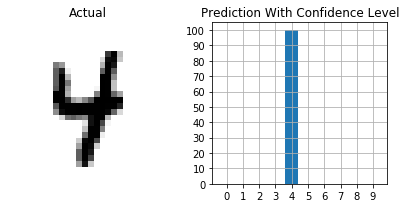

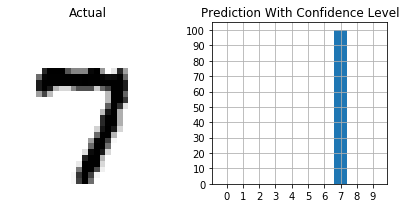

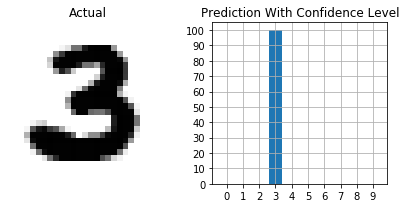

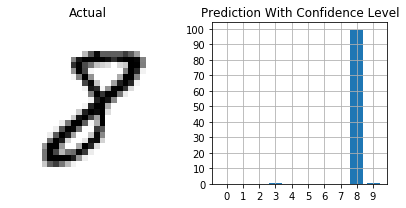

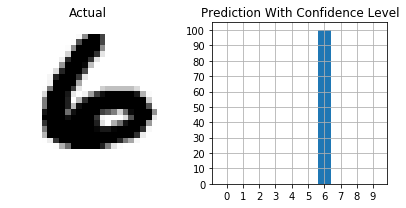

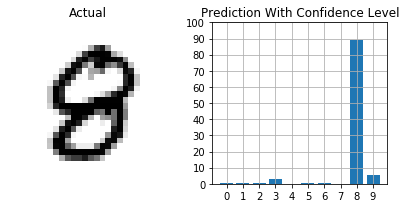

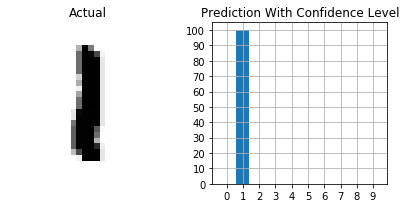

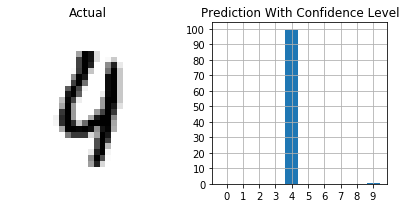

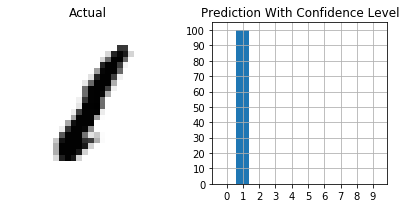

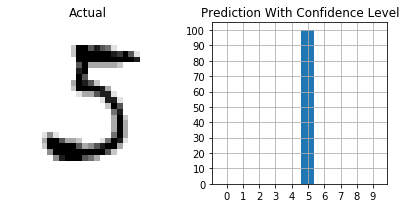

In [51]:
# Visualisasikan 10 prediksi secara acak
visualisasi(prediction_confidence,10)

# Simpan Model

In [52]:
model.save('ai.h5')